<a href="https://colab.research.google.com/github/Nato9-7/EDA_FundamentosML_RenatoDiaz/blob/main/EDA_FundamentosML_RenatoDiaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #Manejo y análisis de datos en estructuras tipo DataFrame.
import numpy as np #Biblioteca para cálculos matemáticos y estadísticos.
import matplotlib.pyplot as plt #Creación de gráficos y visualizaciones.
from matplotlib import style #Estilos de gráficos.
import seaborn as sns #Extensión de matplotlib con diseños estadísticos mejorados.
import scipy.stats as stats #especializado en estadística y probabilidad.
import statsmodels.formula.api as sm

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf


# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",", encoding='latin-1')

Saving archive.zip to archive.zip


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
df['Total_Item'] = df['Quantity'] * df['UnitPrice']

# Calcular las ventas totales por país
ventas_por_pais = df.groupby('Country')['Total_Item'].sum().sort_values(ascending=False)

# Obtener los 10 países con más ventas
top_10_paises = ventas_por_pais.head(10).index

# Filtrar el DataFrame original para incluir solo los 10 países principales
df_top_10 = df[df['Country'].isin(top_10_paises)]

print(top_10_paises)

Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France',
       'Australia', 'Spain', 'Switzerland', 'Belgium', 'Sweden'],
      dtype='object', name='Country')


In [7]:
df = df[df['Quantity'] >= 0]
print("Valor mínimo de Quantity después de filtrar:", df['Quantity'].min())

Valor mínimo de Quantity después de filtrar: 1


El siguiente código es para eliminar datos menores a 0 dentro de la columna quantity, ya que precisamos de solo las compras con una cantidad de pedidos minimos. También descartamos devoluciones.

In [8]:
df = df[df['UnitPrice'] > 0]

El siguiente código elimina las filas con valores negativos de la columna unitprice.

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID,Total_Item
count,530104.000000,530104.000000,397884.000000,530104.000000
mean,10.542037,3.907625,15294.423453,20.121871
std,155.524124,35.915681,1713.141560,270.356743
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [ ]:
df.sample(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Item
536756,581219,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,4,12/8/2011 9:28,4.96,NaN,United Kingdom,19.84
479863,577218,22153,ANGEL DECORATION STARS ON DRESS,48,11/18/2011 12:02,0.42,13117.0,United Kingdom,20.16
526906,580680,22284,HEN HOUSE DECORATION,12,12/5/2011 14:51,1.65,13001.0,United Kingdom,19.80
109317,545595,22745,POPPY'S PLAYHOUSE BEDROOM,2,3/4/2011 10:39,2.10,14570.0,United Kingdom,4.20
190630,553202,22746,POPPY'S PLAYHOUSE LIVINGROOM,1,5/15/2011 16:02,2.10,15854.0,United Kingdom,2.10


In [12]:
# Contar las repeticiones de cada CustomerID
repeticiones_customerID = df['CustomerID'].value_counts()

# Mostrar el resultado
print(repeticiones_customerID)

CustomerID
17841.0    7847
14911.0    5675
14096.0    5111
12748.0    4595
14606.0    2700
           ... 
18084.0       1
13135.0       1
16323.0       1
13017.0       1
18174.0       1
Name: count, Length: 4338, dtype: int64


In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


#Identificación y descripción de las variables (categóricas y numéricas).

InvoiceNo	Categórica (numérica)	Nominal

StockCode	Categórica (numérica)	Nominal

Description	Categórica	Texto/Nominal

Quantity	Numérica	Entero discreto

InvoiceDate	Temporal	Fecha/Hora

UnitPrice	Numérica	Decimal continuo

CustomerID	Categórica (numérica)	Nominal

Country	Categórica	Nominal

Total (implícito)	Numérica	Decimal continuo

#tendecia central y dispersion sobre las tablas quantity y unitprice

In [ ]:
df['Quantity'].describe()

,Quantity
count,530104.000000
mean,10.542037
std,155.524124
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [ ]:
df['UnitPrice'].describe()

,UnitPrice
count,530104.000000
mean,3.907625
std,35.915681
min,0.001000
25%,1.250000
50%,2.080000
75%,4.130000
max,13541.330000


La cantidad de datos es de 530104

**Promedio**

Quantity - 10.655262 [Nos da a entender que el promedio de cantidad de productos que se venden es de 10 por cliente]

UnitPrice - 3.66 [El precio unitario de cada producto ronda aproximadamente 3.66 libras]

**Desviación Estandar**
Quantity - 155

UnitPrice - 35

[La desviación estándar de las dos columnas es alto, por lo que nos da a entender que existe una gran dispersión dentro de los datos. Ya sea, por quantity que nos puede decir que hay productos que se venden en mayor cantidad en comparación con otros, mientras que para el unitprice, nos dice que hay productos mucho más caros que otros]



# MODA

In [ ]:
# Calcular la moda para 'Quantity'
moda_quantity = df_top_10['Quantity'].mode()[0]

# Calcular la moda para 'UnitPrice'
moda_unitprice = df_top_10['UnitPrice'].mode()[0]

print("Moda de Quantity:", moda_quantity)
print("Moda de UnitPrice:", moda_unitprice)

Moda de Quantity: 1
Moda de UnitPrice: 1.25


**Quantity**

La moda entregada es de 1, lo que nos puede dar a entender que la mayoria de la compras son de una sola unidad. Lo que indicaria un comportamiento de compras minoristas. Aunque hay que tener en cuenta que existen compras hechas en el mismo momento por el mismo cliente.

**UnitPrice**

La moda es de 1.25, por lo que el precio unitario más repetido entre los productos es de 1.25 libras

# Análisis de distribución y sesgo

In [ ]:
Quantity_kurtosis = df['Quantity'].kurtosis()
Quantity_skewness = df['Quantity'].skew()

UnitPrice_kurtosis = df['UnitPrice'].kurtosis()
UnitPrice_skewness = df['UnitPrice'].skew()

print(f"Curtosis de Quantity: {Quantity_kurtosis:.2f}" )
print(f"Asimetría de Quantity: {Quantity_skewness:.2f}")

print(f"Curtosis de UnitPrice: {UnitPrice_kurtosis:.2f}" )
print(f"Asímetria de UnitPrice: {UnitPrice_skewness:.2f}")

Curtosis de Quantity: 236462.34
Asímetria de Quantity: 471.73
Curtosis de UnitPrice: 62483.14
Asímetria de UnitPrice: 206.09


Se observa que tanto la curtosis y la asimetría en ambas columnas es bastante alta, lo que nos indica que existen productos que valen demasiado comparados con el promedio lo que nos daría una cola larga hacia la derecha, como también que hay pedidos por cantidades fuera del promedio.

#Probabilidades

In [ ]:
# Obtener la lista de países únicos
paises = df['Country'].unique()

# Calcular la probabilidad para cada país
for pais in paises:
    # Número de clientes del país actual
    num_clientes_pais = df[df['Country'] == pais]['CustomerID'].nunique()

    # Probabilidad de que un cliente sea del país actual
    probabilidad = num_clientes_pais / num_clientes_total

    # Mostrar el resultado
    print(f"La probabilidad de que un cliente sea de {pais} es: {probabilidad:.2%}")

La probabilidad de que un cliente sea de United Kingdom es: 90.36%
La probabilidad de que un cliente sea de France es: 2.01%
La probabilidad de que un cliente sea de Australia es: 0.21%
La probabilidad de que un cliente sea de Netherlands es: 0.21%
La probabilidad de que un cliente sea de Germany es: 2.17%
La probabilidad de que un cliente sea de Norway es: 0.23%
La probabilidad de que un cliente sea de EIRE es: 0.07%
La probabilidad de que un cliente sea de Switzerland es: 0.48%
La probabilidad de que un cliente sea de Spain es: 0.69%
La probabilidad de que un cliente sea de Poland es: 0.14%
La probabilidad de que un cliente sea de Portugal es: 0.44%
La probabilidad de que un cliente sea de Italy es: 0.32%
La probabilidad de que un cliente sea de Belgium es: 0.58%
La probabilidad de que un cliente sea de Lithuania es: 0.02%
La probabilidad de que un cliente sea de Japan es: 0.18%
La probabilidad de que un cliente sea de Iceland es: 0.02%
La probabilidad de que un cliente sea de Channe

Los datos entregados nos indica que existe una gran probabilidad de que un cliente sea del Reino Unido con un 90,36%, en comparación con otros países como Francia que es que es del solo 2,01%.

#Histogramas

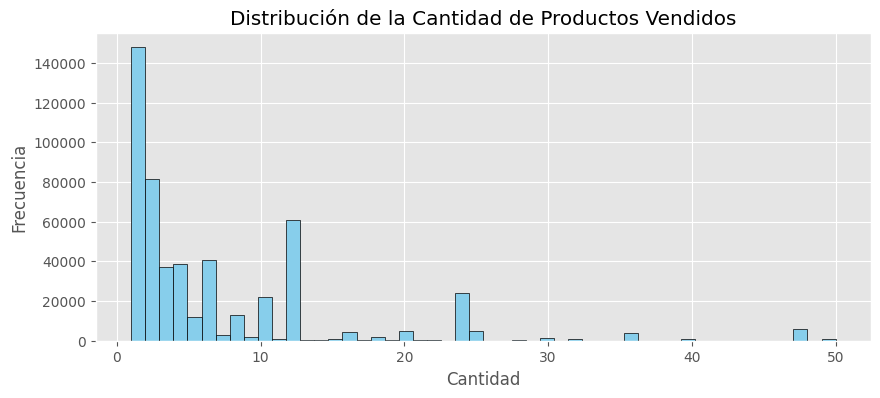

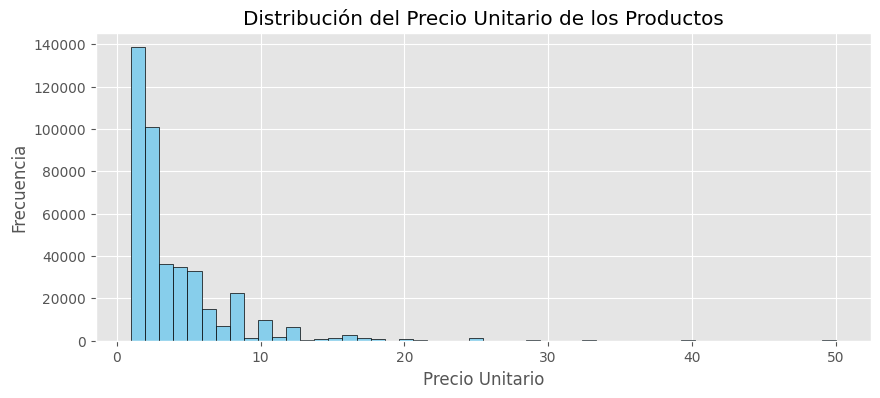

In [ ]:
# Histograma para Quantity
plt.figure(figsize=(10, 4))
plt.hist(df['Quantity'], bins=50, range=(1, 50), color='skyblue', edgecolor='black')
plt.title('Distribución de la Cantidad de Productos Vendidos')  # Título modificado
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para UnitPrice
plt.figure(figsize=(10, 4))
plt.hist(df['UnitPrice'], bins=50, range=(1, 50), color='skyblue', edgecolor='black')
plt.title('Distribución del Precio Unitario de los Productos')  # Título modificado
plt.xlabel('Precio Unitario')  # Etiqueta del eje x modificada
plt.ylabel('Frecuencia')
plt.show()



**Quantity**

Se observa que mayoritariamente se hacen pocas transacciones con pocas unidades (compras minoristas), tambien se observa un sesgo a la derecha ya que existe una cola larga hacia valores altos. Siendo el valor más atipico pedidos de 50 o más unidades

**UnitPrice**

El precio unitario de los productos en su mayoria esta en el rango de 1 a 10 libras, con un sesgo a la derecha con productos que poseen un valor sobre las 50 libras

#Boxplots


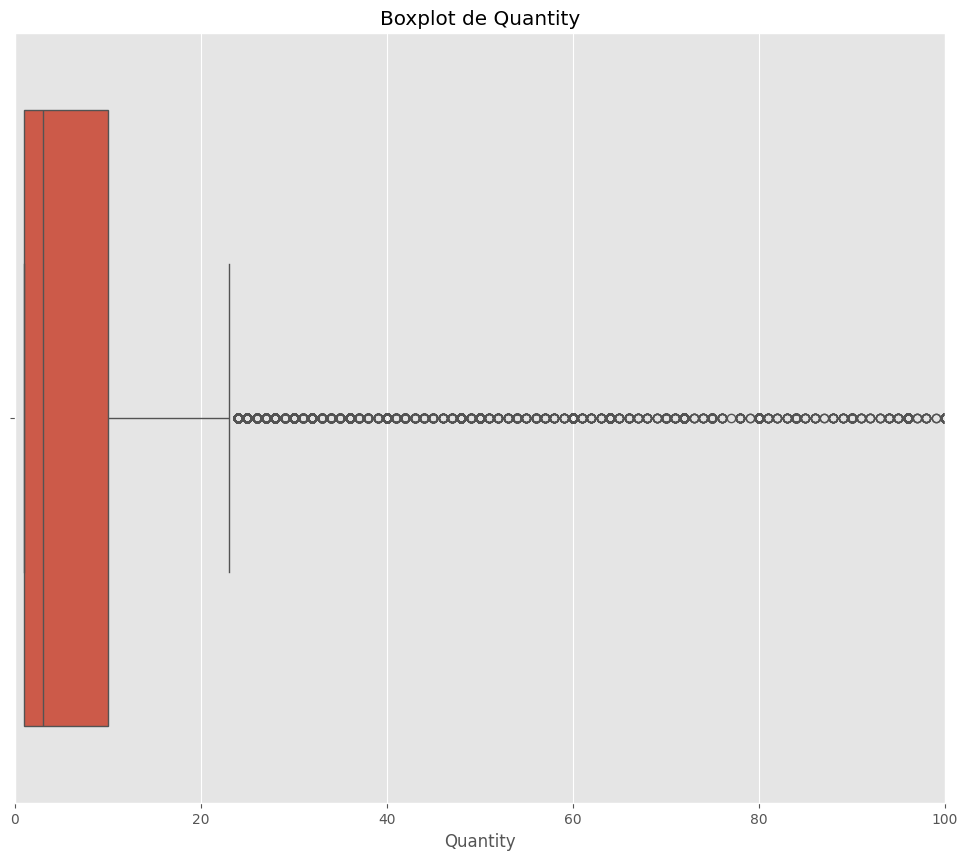

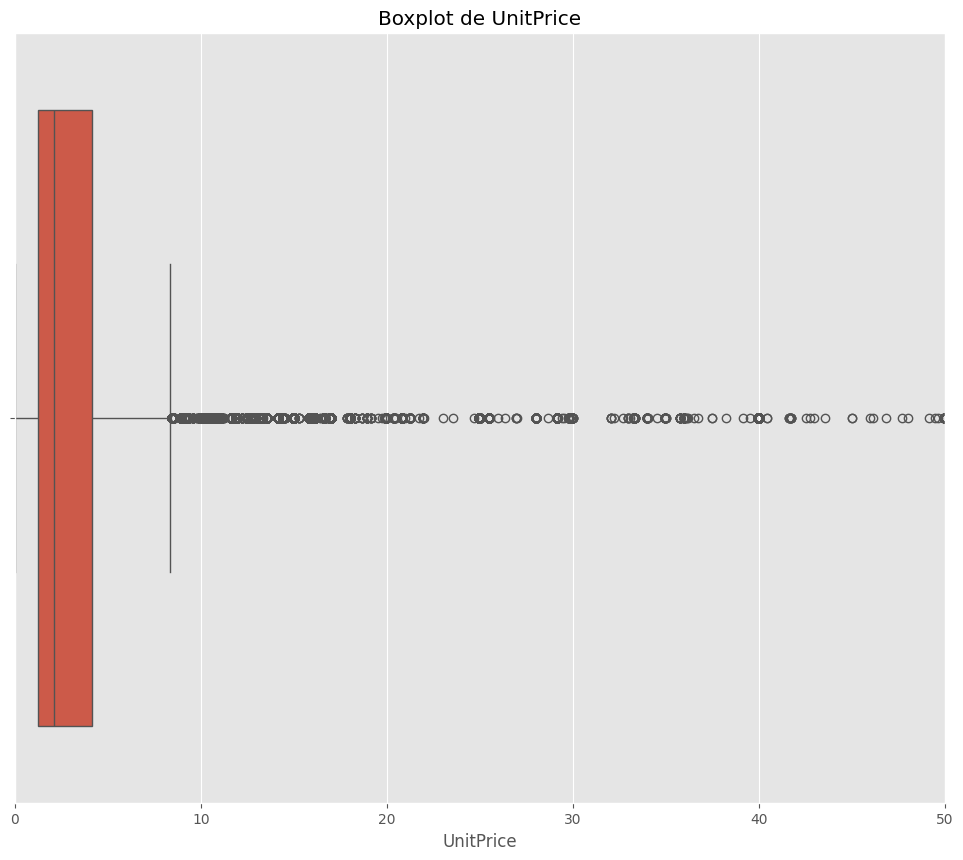

In [ ]:
# Boxplot para Quantity con límite en el eje x
plt.figure(figsize=(12, 10))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot de Quantity')
plt.xlabel('Quantity')
plt.xlim(0, 100)  # Ajusta el rango del eje x según tus datos
plt.show()

# Repite el proceso para UnitPrice con el rango adecuado

# Boxplot para UnitPrice
plt.figure(figsize=(12, 10))
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot de UnitPrice')
plt.xlabel('UnitPrice')
plt.xlim(0, 50)
plt.show()

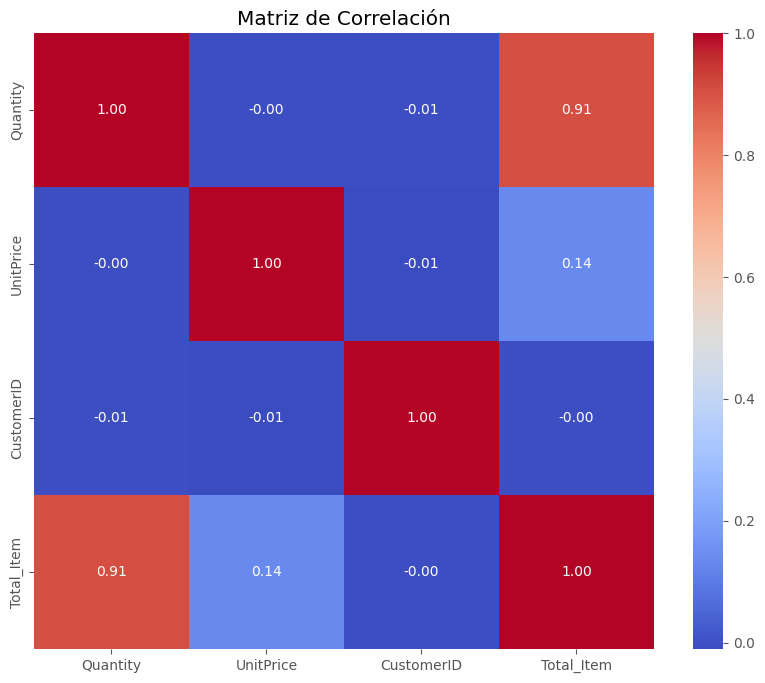

In [ ]:
# Selecciona las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación para las columnas numéricas
correlation_matrix = numeric_df.corr()

# Crea el mapa de calor
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


--- Análisis de Valores Atípicos (Outliers) ---

Variable: Quantity
  Límite superior: 23.50
  Número de outliers: 56363 (10.63% del total)

Variable: UnitPrice
  Límite superior: 8.45
  Número de outliers: 37999 (7.17% del total)


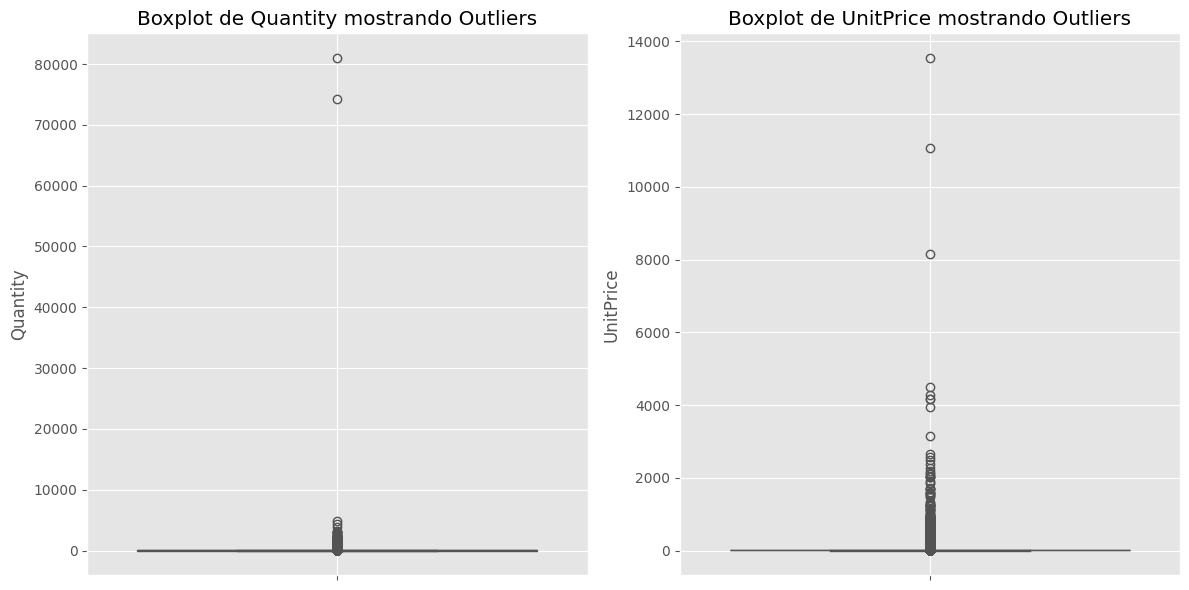

In [ ]:
# Identificación de outliers usando el método de rango intercuartílico (IQR)
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, len(outliers)

# Análisis de outliers para Quantity y UnitPrice
print("\n--- Análisis de Valores Atípicos (Outliers) ---")
outlier_vars = ['Quantity', 'UnitPrice']  # Variables a analizar

for var in outlier_vars:
    outliers, lower, upper, count = identify_outliers(df, var)
    print(f"\nVariable: {var}")
    print(f"  Límite superior: {upper:.2f}")
    print(f"  Número de outliers: {count} ({(count/len(df)*100):.2f}% del total)")

    # Si hay pocos outliers, mostrarlos (ajusta el límite según tus necesidades)
    if count > 0 and count <= 20:
        print("  Valores extremos:")
        print(outliers[var].sort_values(ascending=False).head())

# Visualización específica para outliers en Quantity y UnitPrice
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario

# Boxplot para Quantity
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot de Quantity mostrando Outliers')
plt.grid(True)

# Boxplot para UnitPrice
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
sns.boxplot(y=df['UnitPrice'])
plt.title('Boxplot de UnitPrice mostrando Outliers')
plt.grid(True)

plt.tight_layout()  # Ajusta el espacio entre los subplots
# plt.savefig('outliers_quantity_unitprice.png')  # Descomenta si quieres guardar la figura
plt.show()

**Quantity**

Existen un número de 56363 (10.63%) de outliners en el dataframe, teniendo en cuenta que estos se consideran outliners si son pedidos superiores a 23.50. Todo esto nos da a entender que 1 de cada 10 pedidos supera la cantidad normal

**UnitPrice**

El limite superior es de 8.45 libras de precio unitario para un produco, encima de esto se considera un dato atipico. El número de outliners es de 37999 (7,17%), es decir 1 de 14 productos posee un precio fuera del promedio

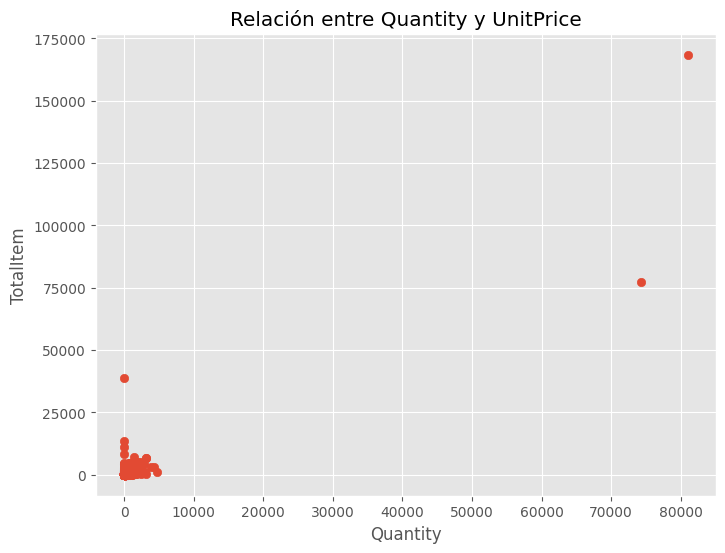

Text(0, 0.5, 'precio total')

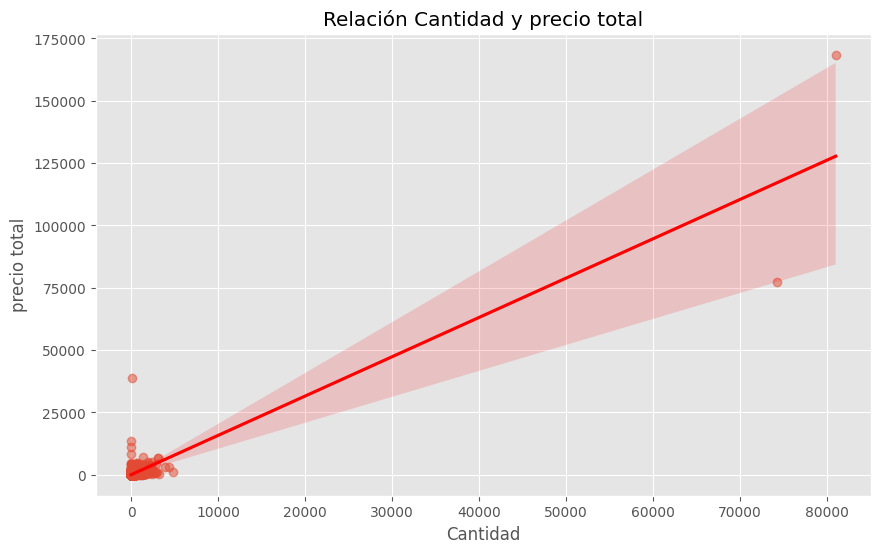

In [ ]:
# Gráfico de dispersión entre Quantity y TotalItem
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['Total_Item'])
plt.title('Relación entre Quantity y UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('TotalItem')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Quantity', y='Total_Item', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relación Cantidad y precio total')
plt.xlabel('Cantidad')
plt.ylabel('precio total')


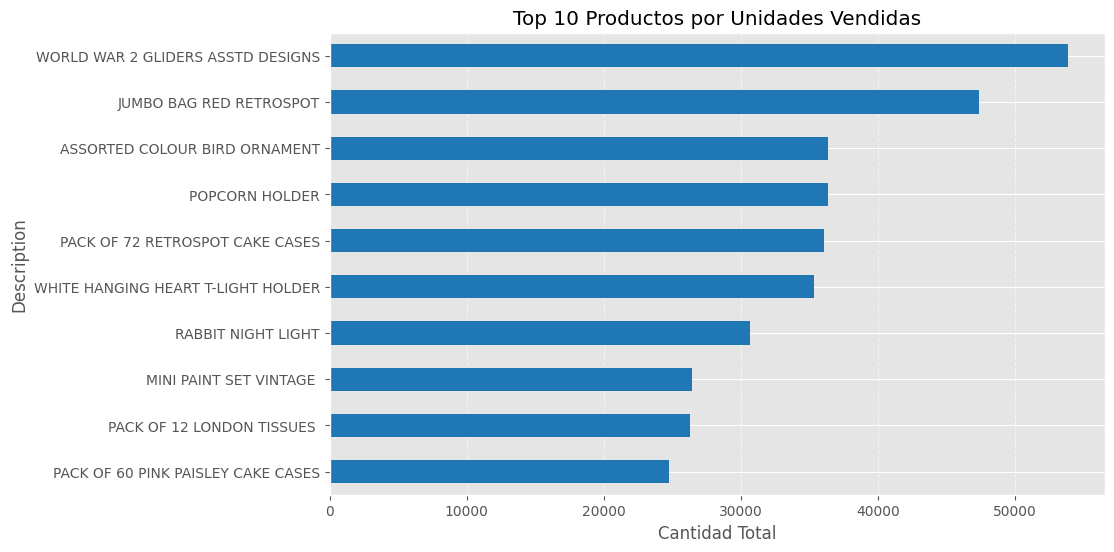

In [ ]:
# Top 10 productos por cantidad
top_10_cantidad = df.groupby('Description')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_10_cantidad.sort_values().plot(kind='barh', color='#1f77b4')
plt.title('Top 10 Productos por Unidades Vendidas')
plt.xlabel('Cantidad Total')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Se observa que entre los 10 productos más vendidos, el que más vendio por cantidad de unidades es el world war 2 gliders asstd designs superando las 50.000 unidades

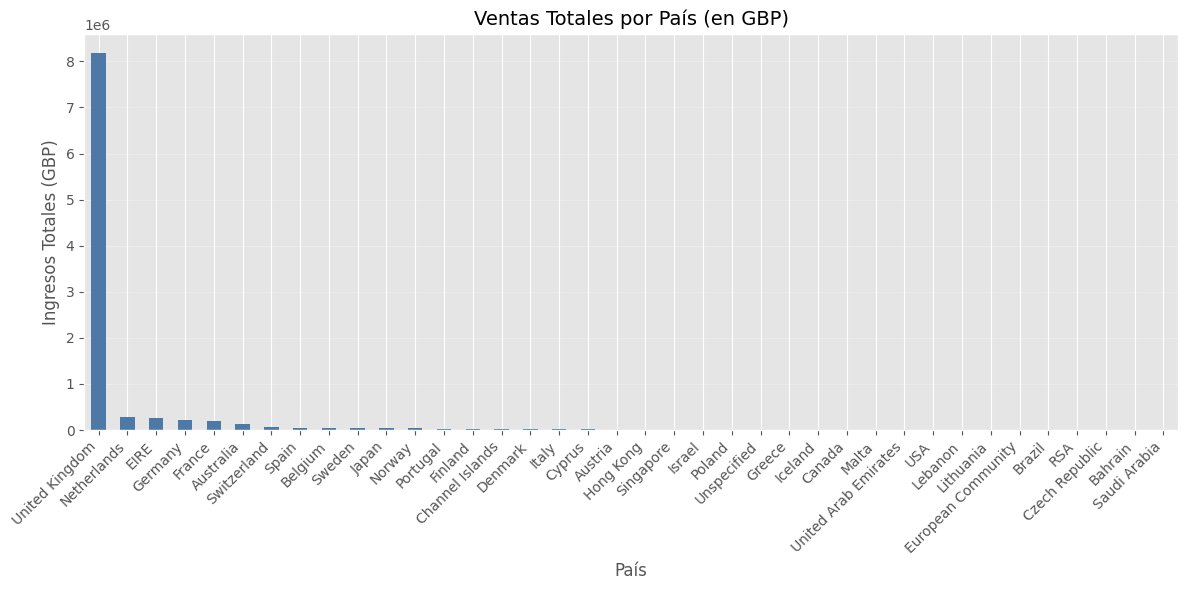

In [ ]:
# Calcular ventas totales por país (en cantidad e ingresos)
ventas_por_pais = df.groupby('Country').agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Revenue=('Total_Item', 'sum')  # Asumiendo que ya creaste la columna Total_Item
).sort_values('Total_Revenue', ascending=False)

# Gráfico de barras (ingresos)
plt.figure(figsize=(12, 6))
ventas_por_pais['Total_Revenue'].plot(kind='bar', color='#4e79a7')
plt.title('Ventas Totales por País (en GBP)', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Ingresos Totales (GBP)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()